# House price analysis
My notebook for [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels?userId=1075113) competition

## Credit: Many thanks to:
- Pedro Marcelino [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

- Sergei Neviadomski [How to get to TOP 25% with Simple Model (sklearn)](https://www.kaggle.com/neviadomski/how-to-get-to-top-25-with-simple-model-sklearn)

- juliencsA [study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- BradenFitz-Gerald [RandomForestRegressor](https://www.kaggle.com/dfitzgerald3/randomforestregressor)



In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, make_scorer
#from xgboost import XGBRegressor
from math import sqrt
from scipy import stats
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the DATA_DIR directory.
DATA_DIR="data-temp"
# Any results you write to the current directory are saved as output.

# Explore data

In [4]:
# Load data. Download from:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train_data = pd.read_csv(DATA_DIR + "/train.csv")
eval_data =  pd.read_csv(DATA_DIR + "/test.csv")

In [5]:
# exploring train data
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data_columns = train_data.columns.values
print(train_data_columns)
print('Train data columns:', len(train_data_columns))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [7]:
eval_data_columns = eval_data.columns.values
print(eval_data_columns)
print('Evaluation data columns:',len(eval_data_columns))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [8]:
print("Train data size:",len(train_data))
print("Test data size:", len(eval_data))
print("Missing columns in test_data:", np.setdiff1d(train_data_columns, eval_data_columns))

Train data size: 1460
Test data size: 1459
Missing columns in test_data: ['SalePrice']


In [9]:
# Check if any cell has NULL value
isnull_data = train_data.isnull().any()
print(isnull_data[isnull_data == True].sort_index())

Alley           True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
BsmtQual        True
Electrical      True
Fence           True
FireplaceQu     True
GarageCond      True
GarageFinish    True
GarageQual      True
GarageType      True
GarageYrBlt     True
LotFrontage     True
MasVnrArea      True
MasVnrType      True
MiscFeature     True
PoolQC          True
dtype: bool


# Analyse SalePrice

In [10]:
train_data['SalePrice'].isnull().any()

False

In [11]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### The historgram is more balance with Logarithm of SalePrice

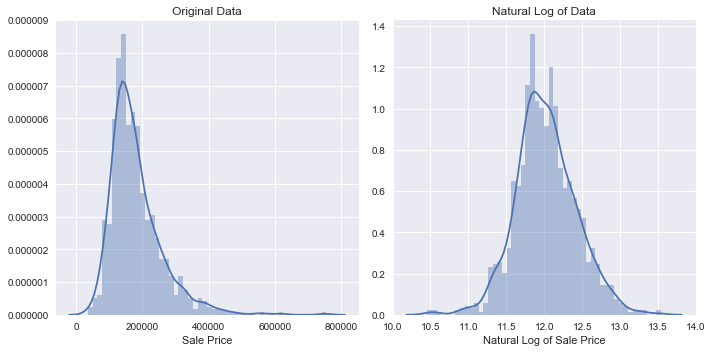

In [12]:
#histogram
#train_data['SalePrice'].hist(bins=20)
target = train_data['SalePrice']
target_log = np.log(target)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

## Check correlation between SalePrice and other columns. Columns have strong relationship with Saleprice will have bigger corr value.

In [13]:
correlation = train_data.corr()['SalePrice'].sort_values()[-10:]
#print(correlation)

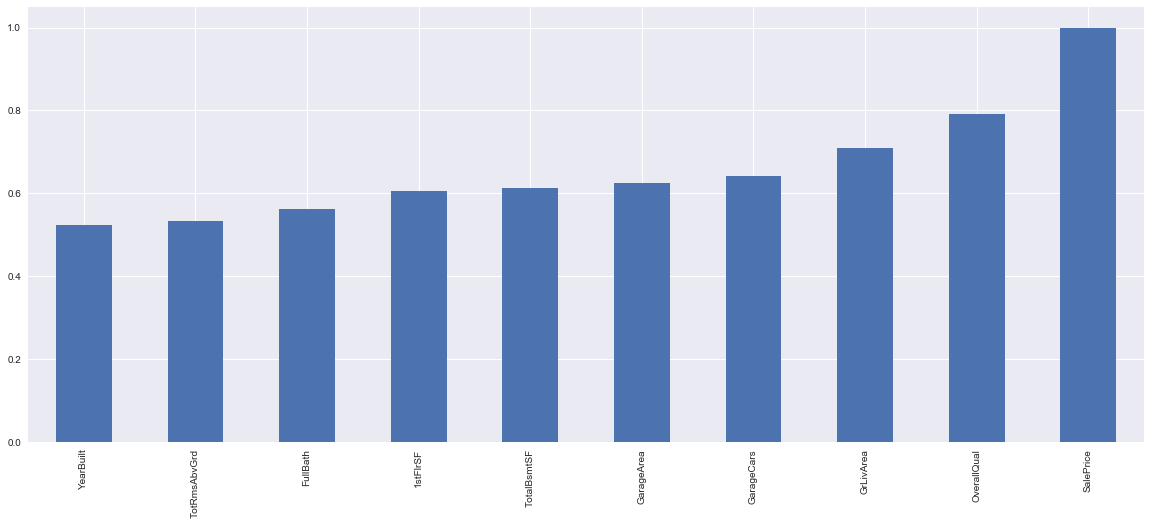

In [14]:
correlation.plot.bar(figsize=(20,8), sort_columns = True)

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


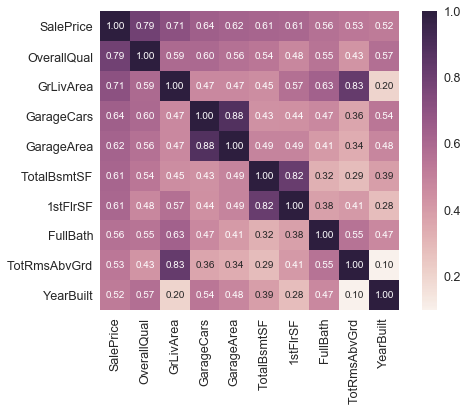

In [15]:
#saleprice correlation matrix
corrmat = train_data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols.values)
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Plot correlation between SalePrice and important features

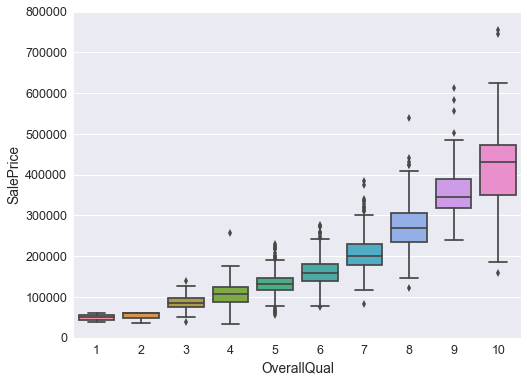

In [16]:
var = 'OverallQual'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);


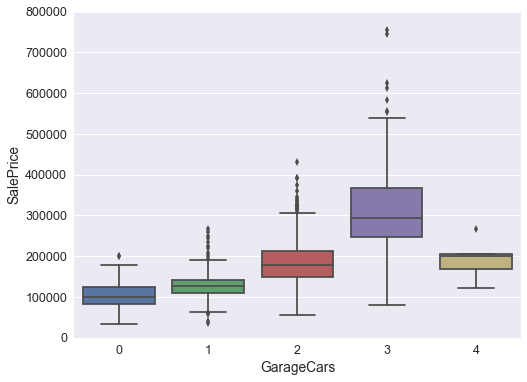

In [17]:
var = 'GarageCars'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);


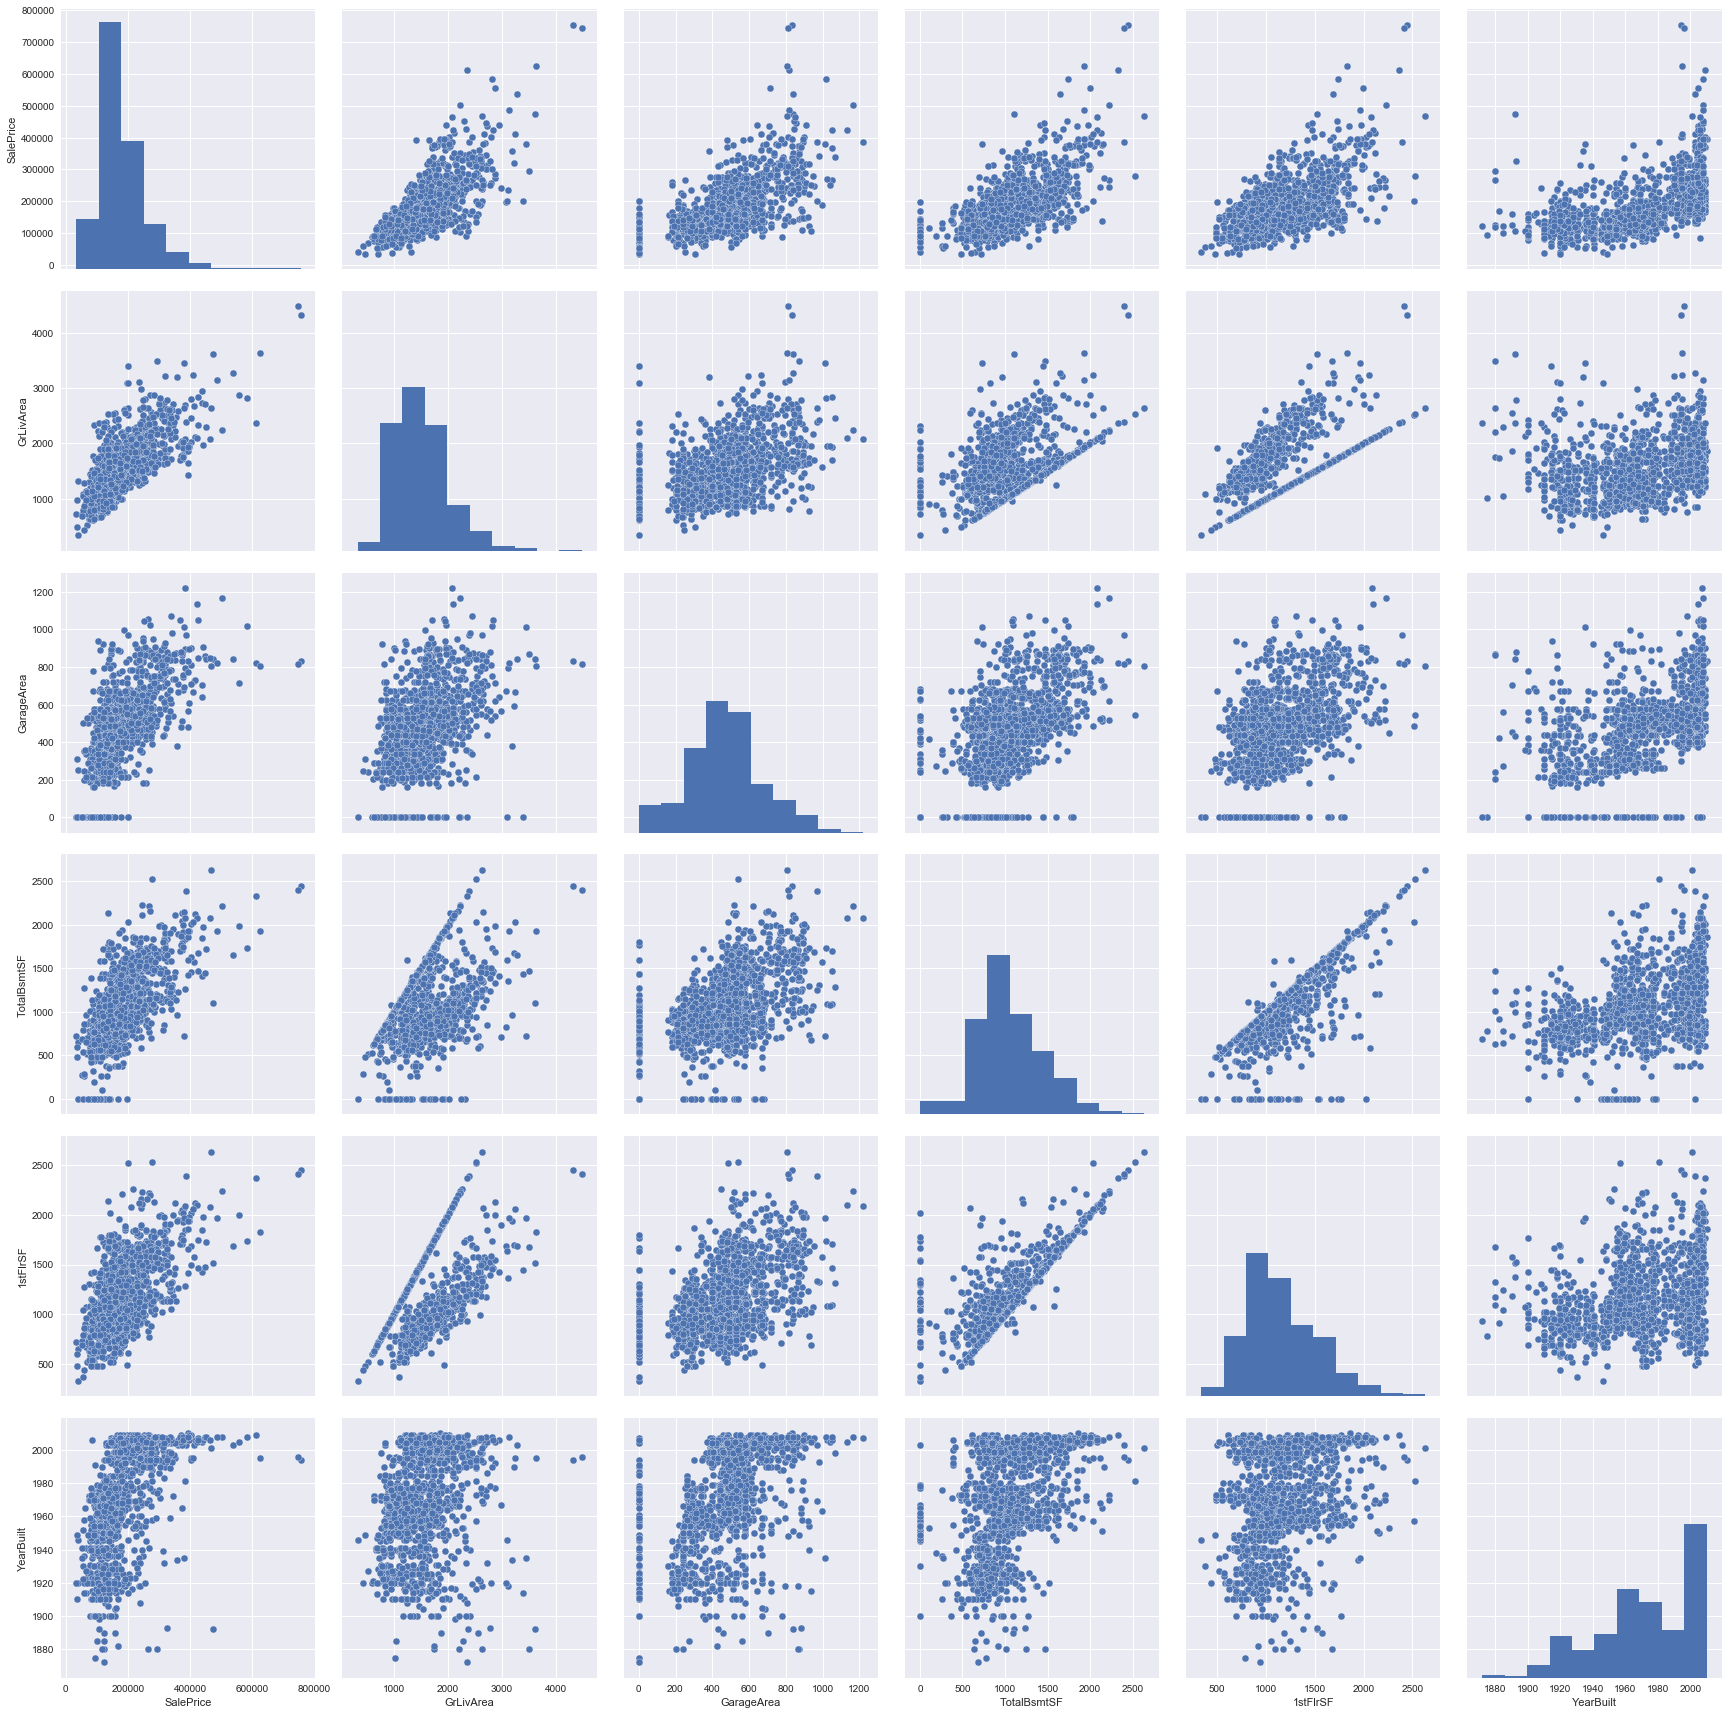

In [61]:
#train_data.plot.scatter(x='GrLivArea', y='SalePrice')
#train_data.plot.scatter(x='GarageArea', y='SalePrice')
#train_data.plot.scatter(x='TotalBsmtSF', y='SalePrice')
#scatterplot
sns.set()
#cols = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF','1stFlrSF']
features = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
sns.pairplot(train_data[features], size = 4)
plt.show();

## Clean data. Drop columns with NaN percent >= 15%

In [62]:
#missing data
#features = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
sub_data = train_data[features]
sub_data.head(5)
null_data = sub_data.isnull()
total = null_data.sum().sort_values(ascending=False)
percent = (null_data.sum()/null_data.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
YearBuilt,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
GarageArea,0,0.0
GrLivArea,0,0.0
SalePrice,0,0.0


### Clean data. Drop Outliner

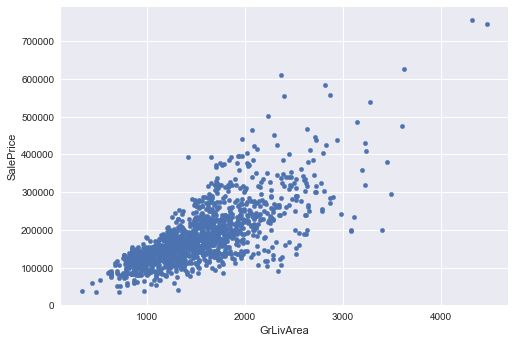

In [20]:
#GrLivArea
#deleting points
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)
train_data.plot.scatter(x='GrLivArea', y='SalePrice')

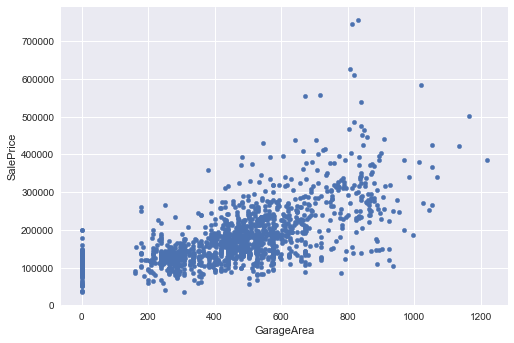

In [21]:
# GarageArea
#deleting points
var = 'GarageArea'
train_data.sort_values(by = var, ascending = False)[:3]
train_data = train_data.drop(train_data[train_data['Id'] == 582].index)
train_data = train_data.drop(train_data[train_data['Id'] == 1191].index)
train_data = train_data.drop(train_data[train_data['Id'] == 1062].index)
train_data.plot.scatter(x=var, y='SalePrice')

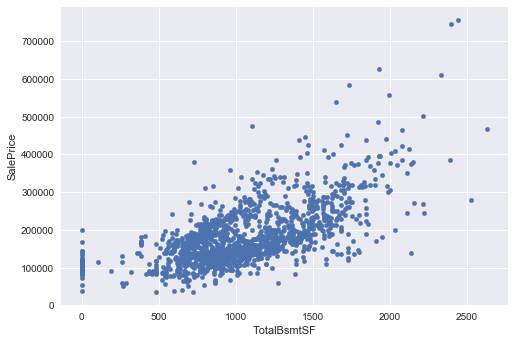

In [22]:
#TotalBsmtSF
#deleting points
var = 'TotalBsmtSF'
train_data.sort_values(by = var, ascending = False)[:3]
train_data = train_data.drop(train_data[train_data['Id'] == 333].index)
train_data = train_data.drop(train_data[train_data['Id'] == 497].index)
train_data = train_data.drop(train_data[train_data['Id'] == 441].index)
train_data.plot.scatter(x=var, y='SalePrice')

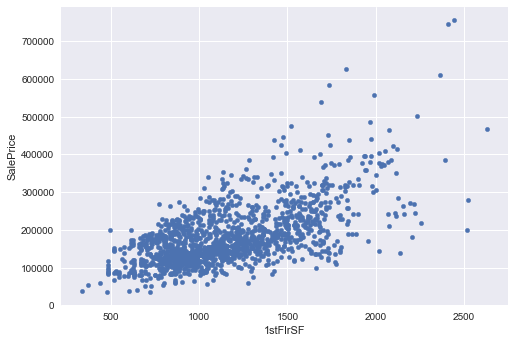

In [23]:
#1stFlrSF
#deleting points
var = '1stFlrSF'
train_data.sort_values(by = var, ascending = False)[:1]
train_data = train_data.drop(train_data[train_data['Id'] == 1025].index)
train_data.plot.scatter(x=var, y='SalePrice')

# Modelling

## Prepare training & testing set

In [76]:
#features = ['GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF']
features.remove('SalePrice')
label = ['SalePrice']
X = train_data[features]
X.head(5)


,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt
0,1710,548,856,856,2003
1,1262,460,1262,1262,1976
2,1786,608,920,920,2001
3,1717,642,756,961,1915
4,2198,836,1145,1145,2000


### Label data: using logarithm to transform skewed data -> increase ML efficiency

In [77]:
Y = np.log(train_data[label])
Y.head(5)

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


### Choose regression model

In [78]:
#model = LinearRegression()
model = RandomForestRegressor(n_estimators=500)
#model = XGBRegressor()

### Use Learning curve to determine train/test split ratio

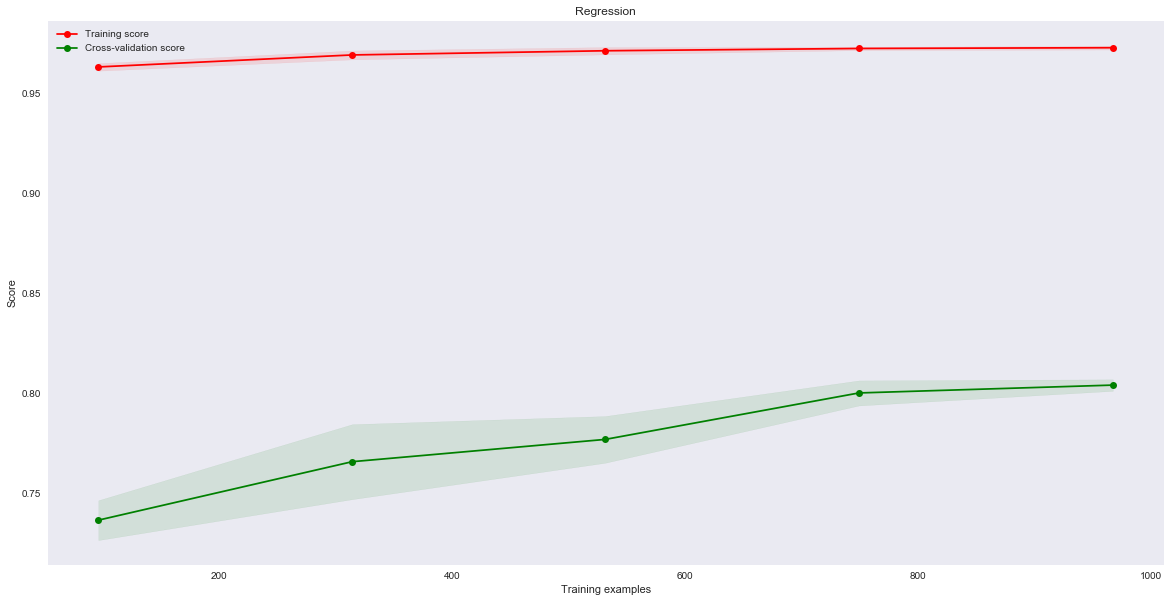

In [79]:
plt.figure(figsize=(20,10))
plt.title("Regression")
# if ylim is not None:
#     plt.ylim(*ylim)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(model, X, Y)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=1000, random_state=324)
print("train size:", len(X_train))
print("test size:", len(X_test))
print("Split ratio", len(X_test)/len(X_train))

train size: 1000
test size: 451
Split ratio 0.451


### Tuning hyper-param of model

In [47]:
def plot_validation_curve(model, param_name, param_range):
    train_scores, test_scores = validation_curve(
    model, X, Y, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVM")
    plt.xlabel("$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    

In [49]:
#param_name = 'n_estimators'
#param_range = [10, 20, 50, 100]
#plot_validation_curve(model, param_name, param_range)

### Fit a model to the training set 

In [81]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Perform Prediction using Linear Regression Model

In [82]:
Y_prediction = model.predict(X_test)
Y_prediction[:5]

array([ 11.84222658,  11.43590774,  12.18866681,  11.92078945,  11.56816164])

### Evaluate Linear Regression Accuracy using Root Mean Square Error 

In [83]:
RMSE1 = sqrt(mean_squared_error(y_true = Y_test, y_pred = Y_prediction))
print("RMSE1:", RMSE1)

RMSE1: 0.1813049413378341


In [84]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
RMSE2 = np.sqrt(-cross_val_score(model, X_test, Y_test, scoring = scorer, cv = 10))
print("RMSE2:", RMSE2.mean())

RMSE2: 0.189683650854


In [85]:
Y_test.describe()

,SalePrice
count,451.000000
mean,12.022777
std,0.391422
min,10.542706
25%,11.775290
50%,12.001505
75%,12.270783
max,13.534473


### Plot prediction

In [88]:
#Plot residuals
print(Y_prediction.shape)
print(Y_test.shape)
Y_prediction - Y_test
#plt.scatter(Y_prediction, Y_prediction - Y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression")
#plt.xlabel("Predicted values")
#plt.ylabel("Residuals")

(451,)
(451, 1)


ValueError: Shape of passed values is (451, 451), indices imply (1, 451)

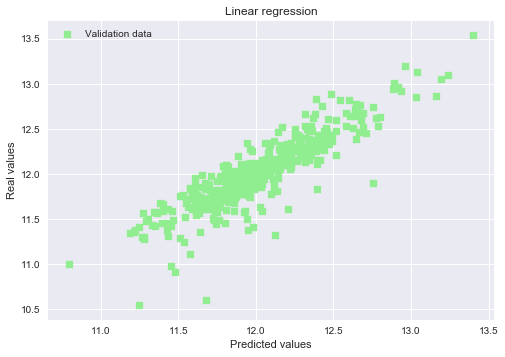

In [87]:
plt.scatter(Y_prediction, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Predict for Test data set

In [89]:
X_eval = eval_data[features]

## Clean NaN data

In [90]:
isnull_data = X_eval.isnull().any()
isnull_data[isnull_data == True].sort_index()

GarageArea     True
TotalBsmtSF    True
dtype: bool

In [91]:
#filling Null daa
X_eval['GarageArea'].fillna(X_eval['GarageArea'].mean(), inplace=True)
X_eval['GarageArea'][:5]

0    730.0
1    312.0
2    482.0
3    470.0
4    506.0
Name: GarageArea, dtype: float64

In [92]:
#filling Null daa
X_eval['TotalBsmtSF'].fillna(X_eval['TotalBsmtSF'].mean(), inplace=True)
X_eval['TotalBsmtSF'][:5]

0     882.0
1    1329.0
2     928.0
3     926.0
4    1280.0
Name: TotalBsmtSF, dtype: float64

In [93]:
X_eval.isnull().any()

GrLivArea      False
GarageArea     False
TotalBsmtSF    False
1stFlrSF       False
YearBuilt      False
dtype: bool

## Predict SalePrice for test data. Use numpy.exp to transform SalePrice to normal (model predicts on log of SalePrice)

In [94]:
Y_eval_log = model.predict(X_eval)
# Transform SalePrice to normal
Y_eval = np.exp(Y_eval_log.ravel())
print(type(Y_eval))
print(Y_eval[:5])

<class 'numpy.ndarray'>
[ 127733.14604541  146288.47173874  184143.52978965  185831.53168209
  192962.75069092]


## Save prediction to CSV

In [95]:
eval_output = pd.DataFrame({'Id': eval_data['Id'], 'SalePrice': Y_eval})
print(len(eval_output))
eval_output.head()

1459


,Id,SalePrice
0,1461,127733.146045
1,1462,146288.471739
2,1463,184143.529790
3,1464,185831.531682
4,1465,192962.750691


In [96]:
today = str(datetime.date.today())
print(today)
eval_output.to_csv(DATA_DIR +'/' +today+'-submission.csv',index=False)

2017-06-24
